<div style="border:solid Chocolate 2px; padding: 40px">

Анна, привет, меня зовут Станислав, и я буду проверять твой проект. Предлагаю общаться на «ты», но если это неудобно - дай знать, и мы перейдем на «вы».
Это учебный проект и здесь не стоит бояться делать ошибки, я хочу поделиться своим опытом и помочь тебе стать аналитиком данных.
Уже выполнена большая работа над проектом, давай сделаем его еще лучше. Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий с замечанием ревьюера:</b> Так выделены самые важные замечания. Как только ты их исправишь проект будет принят. </div>

<div class="alert alert-warning">
<b>Комментарий с небольшим замечанием или советом ревьюера:</b> Так выделены небольшие замечания или советы. 
</div>

<div class="alert alert-success">
<b>Комментарий с комплиментом ревьюера:</b> Так я выделяю все остальные комментарии.</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комментарии — пиши об этом.
Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее.
</div>


<div class="alert alert-info"> <b>Комментарий студента:</b> Cтанислав, добрый день!</div>

<div style="border:solid Chocolate 2px; padding: 40px">

# Общий вывод ревьюера

<div class="alert alert-success">

Проделана хорошая аналитическая работа. Код написан чисто, соблюдена структура проекта, графики оформлены корректно и написаны логичные и обоснованные выводы. Проект выполнен на хорошем аналитическом уровне, поэтому замечаний не много. Я отметил в проекте моменты, на которые необходимо обратить внимание, исправь их и проект будет принят.

- по ссылкам ниже интересные материалы по А/В тестам
  
    
https://habr.com/ru/company/avito/blog/571094/

https://habr.com/ru/company/yandex/blog/476826/

https://academy.yandex.ru/journal/kak-provesti-a-b-testirovanie-6-prostykh-shagov

https://habr.com/ru/company/yandex/blog/342704/

https://r-analytics.blogspot.com/2013/10/blog-post_13.html 

</div>

<div class="alert alert-danger">

- добавь, пожалуйста, заголовок для графика
</div>




# Анализ данных интернет-магазина
Цель исследования - анализ данных о заказах  с целью увеличения выручки интернет-магазина.

Источник данных - статистические данные о гипотезах для проверки, заказах пользователей интернет-магазина и их принадлежности к группе тестирования.

В статистических данных есть информация о гипотезах, заказах пользователей и принадлежности к группе тестирования.

Задачи исследования - определение приоритетной гипотезы, проведение предобработки данных, определение границ аномальных заказов, выявление наличия/отсутствия группы победителя при проведении тестирования по "сырым" и "очищенным" данным, принятие решений по результатам исследования.

Этапы исследования:
1. приоритизация гипотез,
2. построение графиков кумулятивной и относительной выручки и среднего чека по группам, 
3. построение точечного графика количества заказов по пользователям,
4. расчет перцентилей количества и стоимости заказов с целью определения границ аномальных заказов,
5. расчет статистической значимости различий в среднем количестве и стоимости заказов по "сырым" и "очищенным" от аномальных значений заказов,
6. принятие решений, формулировка выводов и рекомендаций по результатам теста.

<div class="alert alert-success">
<b>Комментарий с комплиментом ревьюера:</b> 
    
Здорово, что описана цель проекта, описаны данные и выделено содержание.


In [1]:
#Импортируем необходимые библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from scipy import stats as st

# Часть 1. Приоритизация гипотез

In [2]:
#Загружаем данные о гипотезах
hyp = pd.read_csv('/datasets/hypothesis.csv')

In [3]:
#Выводим первые пять строк с данными о гипотезах
pd.set_option('display.max_colwidth',False)
hyp.head(10)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


<div class="alert alert-warning">
<b>Комментарий с советом ревьюера:</b> 
    
Чтобы названия гипотез выводились целиком, используй настройку pd.set_option('display.max_colwidth', False)
 </div>


<div class="alert alert-info"> <b>Комментарий студента:</b> применена настройка для вывода строчек целиком. </div>

<div class="alert alert-success">
<b>Комментарий с комплиментом ревьюера в2:</b> 
    
Отлично

In [4]:
#Типы данных менять не надо, все типы данных соответствуют 
hyp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [5]:
#Пропуски в данных hyp отсутствуют
hyp.isna().mean()*100

Hypothesis    0.0
Reach         0.0
Impact        0.0
Confidence    0.0
Efforts       0.0
dtype: float64

In [6]:
#Явные дубликаты в hyp отсутствуют
hyp.duplicated().sum()

0

In [7]:
#Проверяем дубликаты в столбце "Hypothesis",
#Дубликаты отсутствуют
hyp[hyp['Hypothesis'].duplicated()]

,Hypothesis,Reach,Impact,Confidence,Efforts


In [8]:
#Применяем фреймворк ICE для приоритизации гипотез
hyp['ICE'] = round(
    hyp['Impact']*hyp['Confidence']/hyp['Efforts'],
    2)
hyp.sort_values(by ='ICE',ascending = False).head(10)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


<div class="alert alert-warning">
<b>Комментарий с советом ревьюера:</b> 

Для удобства можно округлить значения в колонке ICE до 2 знаков после запятой. 
</div>


<div class="alert alert-info"> <b>Комментарий студента:</b> значения в колонке "ICE" округлены до 2 знаков. </div>

<div class="alert alert-success">
<b>Комментарий с комплиментом ревьюера в2:</b> 
    
Отлично

Комментарий:  применение фреймоворка ICE показало, что в первую очередь наиболее перспективные гипотезы - 8,0,7. На первом месте 8-я гипотеза.

In [9]:
#Применяем фреймворк RICE для приоритизации гипотез
hyp['RICE'] = hyp['Reach']*hyp['Impact']*hyp['Confidence']/hyp['Efforts']
pd.set_option('display.max_colwidth',False)
hyp.sort_values(by ='RICE',ascending = False).head(10)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


Комментарий:  применение фреймоворка RICE показало, что в первую очередь наиболее перспективные гипотезы - 7,2,0. На первом месте 7-я гипотеза: добавить форму подписи на все основные страницы, чтобы собрать базу клиентов для email-рассылок.

<b> Комментарий относительно изменения приоритизации гипотех: приоритизация гипотез изменилась при использовании фреймворков RICE и ICE, в  связи с тем, что кроме силы гипотез, показатель RICE учел также охват пользователей, который оказался максимальным у 7-й  гипотезы (добавить форму подписи на все основные страницы). 

<div class="alert alert-success">
<b>Комментарий с комплиментом ревьюера:</b>
    
Гипотезы проанализированы верно, молодец.

Здорово, что указано на изменение приоритетов при учете охвата.
</div>


# Часть 2. Анализ A/B-теста

<b> Готовим сначала данные о заказах

In [10]:
#Загружаем данные о заказах
orders = pd.read_csv('/datasets/orders.csv')
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [11]:
#Выводим информацию о датафрейме orders
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [12]:
#Меняем тип данных столбца date:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [13]:
#Данные заказов представлены за август 2019 года
sorted(orders['date'].unique())

[numpy.datetime64('2019-08-01T00:00:00.000000000'),
 numpy.datetime64('2019-08-02T00:00:00.000000000'),
 numpy.datetime64('2019-08-03T00:00:00.000000000'),
 numpy.datetime64('2019-08-04T00:00:00.000000000'),
 numpy.datetime64('2019-08-05T00:00:00.000000000'),
 numpy.datetime64('2019-08-06T00:00:00.000000000'),
 numpy.datetime64('2019-08-07T00:00:00.000000000'),
 numpy.datetime64('2019-08-08T00:00:00.000000000'),
 numpy.datetime64('2019-08-09T00:00:00.000000000'),
 numpy.datetime64('2019-08-10T00:00:00.000000000'),
 numpy.datetime64('2019-08-11T00:00:00.000000000'),
 numpy.datetime64('2019-08-12T00:00:00.000000000'),
 numpy.datetime64('2019-08-13T00:00:00.000000000'),
 numpy.datetime64('2019-08-14T00:00:00.000000000'),
 numpy.datetime64('2019-08-15T00:00:00.000000000'),
 numpy.datetime64('2019-08-16T00:00:00.000000000'),
 numpy.datetime64('2019-08-17T00:00:00.000000000'),
 numpy.datetime64('2019-08-18T00:00:00.000000000'),
 numpy.datetime64('2019-08-19T00:00:00.000000000'),
 numpy.datet

In [14]:
#Пропуски в данных orders отсутствуют
orders.isna().mean()*100

transactionId    0.0
visitorId        0.0
date             0.0
revenue          0.0
group            0.0
dtype: float64

In [15]:
#Явные дубликаты в orders отсутствуют
orders.duplicated().sum()

0

In [16]:
#Явные дубликаты имеет смысл искать только в столбце "transactionId",их там нет:
orders[orders['transactionId'].duplicated()]

,transactionId,visitorId,date,revenue,group


Комментарий: загружены данные о заказах, скорректирован тип данных в столбце "date", пропуски, явные и неявные дубликаты в данных отсутствуют, данные о заказах представлены за август 2019 года.  

<b> Готовим данные о посетителях

In [17]:
#Загружаем данные о посетителях
visitors = pd.read_csv('/datasets/visitors.csv')
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [18]:
#Cмотрим тип данных в visitors:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [19]:
#Меняем тип данных в столбце "date" и делаем проверку:
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [20]:
#Пропуски в данных отсутствуют:
visitors.isna().mean()*100

date        0.0
group       0.0
visitors    0.0
dtype: float64

In [21]:
#Явные дубликаты в visitors отсутствуют
visitors.duplicated().sum()

0

In [22]:
#Проверяем дубликаты в столбце "date" для группы B.
#Дубликаты отсутствуют
visitors_b = visitors.query('group == "B"')
visitors_b[visitors_b['date'].duplicated()]

,date,group,visitors


In [23]:
#Проверяем дубликаты в столбце "date" для группы A.
#Дубликаты отсутствуют
visitors_a = visitors.query('group == "A"')
visitors_a[visitors_a['date'].duplicated()]

,date,group,visitors


In [24]:
#Смотрим на какие даты представлены данные о посетителях
sorted(visitors['date'].unique())

[numpy.datetime64('2019-08-01T00:00:00.000000000'),
 numpy.datetime64('2019-08-02T00:00:00.000000000'),
 numpy.datetime64('2019-08-03T00:00:00.000000000'),
 numpy.datetime64('2019-08-04T00:00:00.000000000'),
 numpy.datetime64('2019-08-05T00:00:00.000000000'),
 numpy.datetime64('2019-08-06T00:00:00.000000000'),
 numpy.datetime64('2019-08-07T00:00:00.000000000'),
 numpy.datetime64('2019-08-08T00:00:00.000000000'),
 numpy.datetime64('2019-08-09T00:00:00.000000000'),
 numpy.datetime64('2019-08-10T00:00:00.000000000'),
 numpy.datetime64('2019-08-11T00:00:00.000000000'),
 numpy.datetime64('2019-08-12T00:00:00.000000000'),
 numpy.datetime64('2019-08-13T00:00:00.000000000'),
 numpy.datetime64('2019-08-14T00:00:00.000000000'),
 numpy.datetime64('2019-08-15T00:00:00.000000000'),
 numpy.datetime64('2019-08-16T00:00:00.000000000'),
 numpy.datetime64('2019-08-17T00:00:00.000000000'),
 numpy.datetime64('2019-08-18T00:00:00.000000000'),
 numpy.datetime64('2019-08-19T00:00:00.000000000'),
 numpy.datet

Комментарий: загружены данные о посетителях, скорректирован тип данных в столбце "date", пропуски, явные и неявные дубликаты в данных отсутствуют, данные о посетителях представлены за август 2019 года.  

In [25]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [26]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [27]:
#В таблицах "orders" и "visitors" по две группы AB-теста.
print(orders['group'].unique())
print(visitors['group'].unique())

['B' 'A']
['A' 'B']


In [28]:
#Посмотрим дату начала и окончания теста:
sorted(orders['date'].unique())

[numpy.datetime64('2019-08-01T00:00:00.000000000'),
 numpy.datetime64('2019-08-02T00:00:00.000000000'),
 numpy.datetime64('2019-08-03T00:00:00.000000000'),
 numpy.datetime64('2019-08-04T00:00:00.000000000'),
 numpy.datetime64('2019-08-05T00:00:00.000000000'),
 numpy.datetime64('2019-08-06T00:00:00.000000000'),
 numpy.datetime64('2019-08-07T00:00:00.000000000'),
 numpy.datetime64('2019-08-08T00:00:00.000000000'),
 numpy.datetime64('2019-08-09T00:00:00.000000000'),
 numpy.datetime64('2019-08-10T00:00:00.000000000'),
 numpy.datetime64('2019-08-11T00:00:00.000000000'),
 numpy.datetime64('2019-08-12T00:00:00.000000000'),
 numpy.datetime64('2019-08-13T00:00:00.000000000'),
 numpy.datetime64('2019-08-14T00:00:00.000000000'),
 numpy.datetime64('2019-08-15T00:00:00.000000000'),
 numpy.datetime64('2019-08-16T00:00:00.000000000'),
 numpy.datetime64('2019-08-17T00:00:00.000000000'),
 numpy.datetime64('2019-08-18T00:00:00.000000000'),
 numpy.datetime64('2019-08-19T00:00:00.000000000'),
 numpy.datet

In [29]:
#Проверим, есть ли пользователи в таблице с заказами, которые попали одновременно в обе группы А и В
visitorId_from_AB = orders.loc[orders['group']=='A','visitorId'].isin(orders.loc[orders['visitorId']=='B','visitorId'])
#Такие пользователи отсутствуют:
visitorId_from_AB.unique()

array([False])

Комментарий: представлены две группы в АВ-тесте, дата начала теста - 01.08.2019, дата окончания теста - 31.08.2019, каждый пользователь попал только в одну группу.

<div class="alert alert-warning">
<b>Комментарий с советом ревьюера:</b>

Чтобы лучше изучить данные можешь посмотреть:

-  сколько у нас групп в АВ-тесте;
-  даты начала и окончания теста; 
-  не попадают ли какие-то пользователи в обе группы - по таблице с заказами. 
 
</div>


<div class="alert alert-info"> <b>Комментарий студента:</b> даннные изучены по вышеприведенным критериям, добавлен комментарий. </div>

<div class="alert alert-success">
<b>Комментарий с комплиментом ревьюера в2:</b> 
    
Отлично

In [30]:
orders.head(10)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


In [31]:
print(visitors[visitors['group']=='A'].count())
print(visitors[visitors['group']=='B'].count())
print(orders[orders['group']=='A'].count())
print(orders[orders['group']=='B'].count())

date        31
group       31
visitors    31
dtype: int64
date        31
group       31
visitors    31
dtype: int64
transactionId    557
visitorId        557
date             557
revenue          557
group            557
dtype: int64
transactionId    640
visitorId        640
date             640
revenue          640
group            640
dtype: int64


<div class="alert alert-success">
<b>Комментарий с комплиментом ревьюера:</b>
    
Данные корректно подготовлены к работе.
</div>


<b>2.1. Анализ графика кумулятивной выручки по группам

In [32]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates() 

In [33]:
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])


In [34]:
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])


In [35]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


<div class="alert alert-success">
<b>Комментарий с комплиментом ревьюера:</b>
    
Здорово, что создан объединенный датафрейм и корректно отображены названия столбцов.
</div>


Text(0, 0.5, 'Выручка')

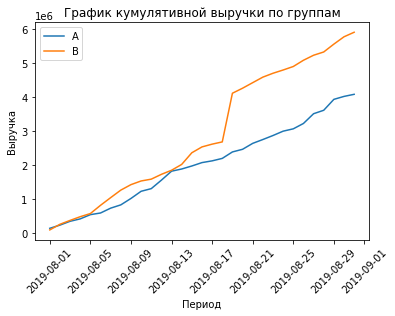

In [36]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.xticks(rotation=45)
plt.legend() 
plt.title('График кумулятивной выручки по группам')
plt.xlabel('Период')
plt.ylabel('Выручка')

Комментарий: выручка группы B после 13 августа вырывается вперед и стабильно превышает выручку группы А до конца наблюдений.
В отличие от выручки группы А выручка группы В меняется скачкообразно, можно предположить, что резкие скачки связаны с большими единичными заказами.

<div class="alert alert-success">
<b>Комментарий с комплиментом ревьюера:</b>
    
График интерпретирован верно, здорово, что выдвинуто предположение природы появления всплеска.
</div>


<b> 2.2 Анализ графика кумулятивного среднего чека по группам. 

Text(0, 0.5, 'Средний чек')

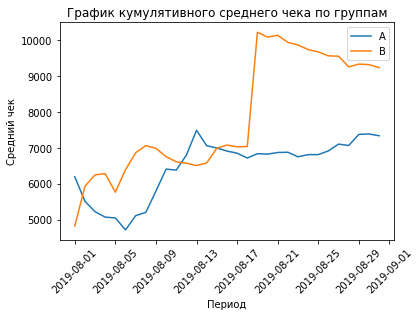

In [37]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xticks(rotation=45)
plt.legend() 
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Период')
plt.ylabel('Средний чек')

Комментарий: кумулятивное значение среднего чека колеблется. После 17 августа кумулятивное значение среднего чека по группе В превышает значение среднего чека по группе А, возможно были выбросы по выручке из группы В. Принимать решение по данной метрике рано.

<div class="alert alert-success">
<b>Комментарий с комплиментом ревьюера:</b>
    
Согласен с выводом по графику.
</div>


<b> 2.3 Анализ графика относительного среднего чека по группам. 

(array([18109., 18113., 18117., 18121., 18125., 18129., 18133., 18137.,
        18140.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

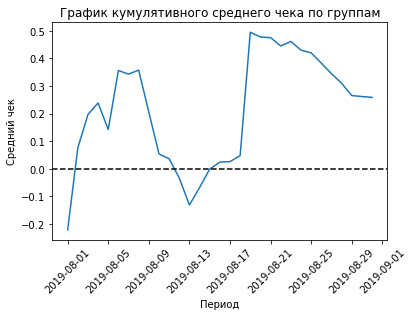

In [38]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Период')
plt.ylabel('Средний чек')

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation=45)

Комментарий: построены различия в средних чеках между группами А и В. Результаты теста менялись несколько раз. В основном на наблюдаемом интервале средний размер чека из группы В превышает средний размер чека группы А, кроме двух дат 1 и 13 августа, вероятно, в эти даты были аномально большие чеки  группы А.

<div class="alert alert-success">
<b>Комментарий с комплиментом ревьюера:</b>
    
Сначала средний чек группы B стабильно растет, потом резко падает и снова растет. Согласен, влияние крупных заказов.   
</div>


<b> 2.4. Анализ графика кумулятивного среднего количества заказов на посетителя по группам 

(array([18109., 18113., 18117., 18121., 18125., 18129., 18133., 18137.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

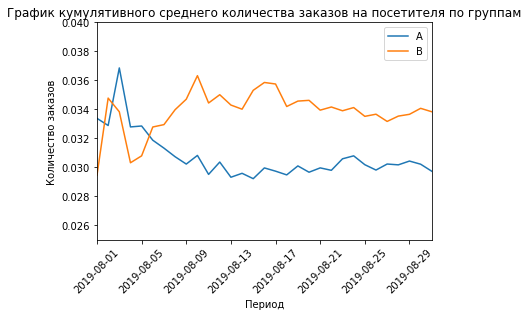

In [39]:
#Добавляем столбец конверсии 
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel('Период')
plt.ylabel('Количество заказов')

# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), 0.025, 0.04]) 
plt.xticks(rotation=45)


Комментарий: в начале теста конверсии групп сильно колебались и нельзя было сделать однозначный вывод о соотношении конверси групп. Далее конверсии стабилизировались и выяснилось, что конверсия группы В лидирует.

<div class="alert alert-success">
<b>Комментарий с комплиментом ревьюера:</b>
    
Все верно, среднее количество заказов группы В продолжает выигрывать до конца.  
</div>


<b> 2.5. Анализ графика относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.

(array([18109., 18113., 18117., 18121., 18125., 18129., 18133., 18137.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

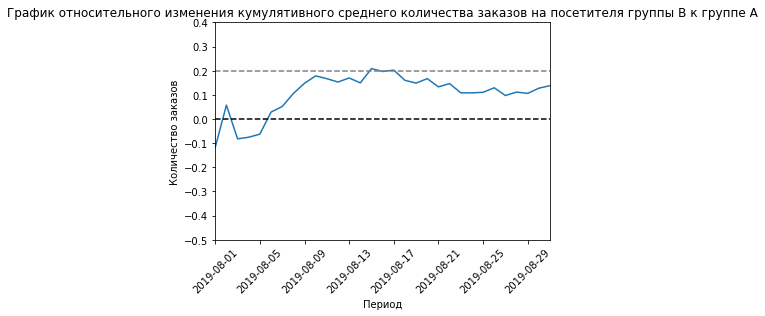

In [40]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, 
         label="Относительный прирост конверсии группы B относительно группы A")
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xlabel('Период')
plt.ylabel('Количество заказов')

# задаем масштаб осей
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), -0.5, 0.4]) 
plt.xticks(rotation=45)


Комментарий: построены различия в средних количествах заказов между группами А и В. Результаты теста менялись несколько раз. В основном на наблюдаемом интервале среднее количество заказов группы В превышает количество заказов группы А, за исключением периода до 05.08.2019.

<div class="alert alert-success">
<b>Комментарий с комплиментом ревьюера:</b>
    
Все верно, здорово, что была использована axhline.


<b> 2.6. Анализируем точечный график количества заказов по пользователям. 

Text(0, 0.5, 'Количество заказов')

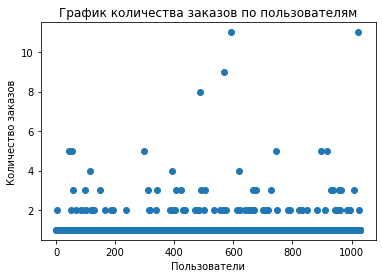

In [41]:
#Найдем сначала число заказов по пользователям
ordersByUsers = (orders.groupby('visitorId',as_index = False).agg({'transactionId':'nunique'}))

#Переименуем названия колонок
ordersByUsers.columns = ['userId','orders']
#Делаем серию из чисел от  0  до количества наблюдений в заказах пользователей (ordersByUsers):
x_value = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_value,ordersByUsers['orders'])
plt.title('График количества заказов по пользователям')
plt.xlabel('Пользователи')
plt.ylabel('Количество заказов')

Комментарий: преимущественное большинство пользователей делают 1 заказ, чуть реже два. 

<div class="alert alert-success">
<b>Комментарий с комплиментом ревьюера:</b>
    
Все верно


<b> 2.7. Рассчитываем 95-й и 99-й перцентиль заказов, определяем границу аномальных заказов.

In [42]:
#Рассчитаем 95-й и 99-й перцентили заказов
np.percentile(ordersByUsers['orders'],[95,99])

array([2., 4.])

Комментарий: не более 5% пользователей сделали 2 заказа, не более 1% пользователей сделали 4 заказа. Принимая во внимание расчет перцентилей и график распределения заказов, будем считать количество заказов больше 2 аномальным.

<div class="alert alert-success">
<b>Комментарий с комплиментом ревьюера:</b>

95-й и 99-й перцентили определены верно, нижняя граница числа заказов выбрана корректно, молодец.</div>


<b> 2.8. Анализируем точечный график стоимости заказов. 

Text(0, 0.5, 'Стоимость заказов')

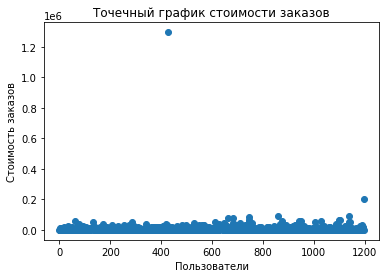

In [43]:
#Делаем серию из чисел от  0  до количества наблюдений в заказах пользователей (orders):
y_value = pd.Series(range(0,len(orders)))
plt.scatter(y_value,orders['revenue'])
plt.title('Точечный график стоимости заказов')
plt.xlabel('Пользователи')
plt.ylabel('Стоимость заказов')

<div class="alert alert-danger">
<b>Комментарий с замечанием:</b> 
    
Добавь, пожалуйста, заголовок для графика.
 
</div>


<div class="alert alert-info"> <b>Комментарий студента:</b> заголовок графика добавлен. </div>

<div class="alert alert-success">
<b>Комментарий с комплиментом ревьюера в2:</b> 
    
Отлично

In [44]:
#Рассмотрим в тибличном виде распределение стоимостей заказов
orders.sort_values(by='revenue',ascending=False).head(15)

,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
858,192721366,1316129916,2019-08-27,93940,A
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B
682,1216533772,4266935830,2019-08-29,78990,B
662,1811671147,4266935830,2019-08-29,78990,A
743,3603576309,4133034833,2019-08-09,67990,A
1103,1348774318,1164614297,2019-08-12,66350,A
1099,316924019,148427295,2019-08-12,65710,A


Комментарий: все заказы, за исключением двух аномалий не превышают 100 тыс. руб., кроме того заказы свыше 60 тыс. руб. тоже встречаются достаточно редко. Необходимо проанализировать перцентили заказов для определения границ стоимости аномальных заказов.

<b> 2.9. Рассчитываем 95-й и 99-й перцентили стоимости заказов. Выбираем границу для определения аномальных заказов.

In [45]:
np.percentile(orders['revenue'],[95,99])

array([28000. , 58233.2])

Коментарий: с вероятностью 99% стоимость заказа не превысит 58,2 тыс. руб., с вероятностью 95% стоимость заказов не превысит 28 тыс. руб. Учитывая существенность разницы стоимости аномальных заказов при 95 и 99% перцентилях, будем считать границу аномальных заказов на уровне 95%, т.е. заказы свыше 28 тыс. руб.будем считать аномальными.


<div class="alert alert-success">
<b>Комментарий с комплиментом ревьюера:</b>

95-й и 99-й перцентили определены верно, нижняя граница стоимости заказов выбрана корректно, молодец.</div>


<b> 2.10 Рассчитываем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. 

Сформулируем гипотезы. 
- Нулевая: различий в среднем количестве заказов между группами нет. 
- Альтернативная: различия в среднем между группами есть.

Критический уровень статистической значимости:
alpha = 0.05 

В связи с наличием в данных больших выбросов, будем использовать непараметрический тест Уилкоксона-Манна-Уитни, позволяющий проранжировать данные и не учитывать алгебраические критерии выборки.

<div class="alert alert-success">
<b>Комментарий с комплиментом ревьюера:</b> 

Гипотезы сформулированы верно, молодец.
</div>


<div class="alert alert-danger">
<b>Комментарий с замечанием:</b> 
    
Вместе с формулировкой гипотез необходимо задать значение alpha и указать какой метод будешь использовать для проверки гипотез.
</div>


<div class="alert alert-info"> <b>Комментарий студента:</b> значение alpha задано, комментарий по выбору метода добавлен. </div>

<div class="alert alert-success">
<b>Комментарий с комплиментом ревьюера в2:</b> 
    
Отлично

In [46]:
# Готовим данные для расчетов
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5))

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01  24              148579           21               
1 2019-08-02  20              93822            24               
2 2019-08-03  24              112473           16               
3 2019-08-04  16              70825            17               
4 2019-08-05  25              124218           23               

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0  101217           24                  148579                
1  165531           44                  242401                
2  114248           68                  354874                
3  108571           84                  425699                
4  92428            109                 549917                

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0  21                  101217               719                
1  45                  266748               619                
2  61                  380996         

Названия столбцов
- date — дата;
- ordersPerDateA — количество заказов в выбранную дату в группе A;
- revenuePerDateA — суммарная выручка в выбранную дату в группе A;
- ordersPerDateB — количество заказов в выбранную дату в группе B;
- revenuePerDateB — суммарная выручка в выбранную дату в группе B;
- ordersCummulativeA — суммарное число заказов до выбранной даты включительно в группе A;
- revenueCummulativeA — суммарная выручка до выбранной даты включительно в группе A;
- ordersCummulativeB — суммарное количество заказов до выбранной даты включительно в группе B;
- revenueCummulativeB — суммарная выручка до выбранной даты включительно в группе B;
- visitorsPerDateA — количество пользователей в выбранную дату в группе A;
- visitorsPerDateB — количество пользователей в выбранную дату в группе B;
- visitorsCummulativeA — количество пользователей до выбранной даты включительно в группе A;
- visitorsCummulativeB — количество пользователей до выбранной даты включительно в группе B.

In [47]:
#Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders']. 
#В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов. 
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

In [48]:
#Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. 
#Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0) 

In [49]:
# Применим критерий Манна-Уитни и отформатируем p-value, округлив его до трёх знаков после запятой. 
# Выведем относительный прирост среднего числа заказов группы B: среднее число заказов группы B / среднее число заказов группы A - 1.  
# Округлим до трёх знаков после запятой.
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)


print('p-value:',"{0:.3f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))
print('Прирост группы В по отношению к группе А:',"{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value: 0.017
Прирост группы В по отношению к группе А: 0.138


<div class="alert alert-warning">
<b>Комментарий с советом ревьюера:</b>
    
Для того, чтобы твой проект стал еще лучше я бы порекомендовал подправить оформление вывода - сейчас не ясно, что означает та или иная цифра, подпиши, пожалуйста, какое число  - p-value, а какое - различие в средних

</div>


<div class="alert alert-success">
<b>Комментарий с комплиментом ревьюера в2:</b> 
    
Отлично

<div class="alert alert-info"> <b>Комментарий студента:</b> оформление вывода скорректировано. </div>

Вывод: P-value меньше 0,05, значит нулевую гипотезу не отвергаем, по «сырым» данным различия в среднем числе заказов групп A и B отсутствуют. Относительный прирост группы В к конверсии группы А составил 13,8%.

<div class="alert alert-success">
<b>Комментарий с комплиментом ревьюера:</b> 

Гипотеза проверена верно.
</div>


<b> 2.11 Рассчитываем статистическую значимость различий в среднем чеке заказов между группами по «сырым» данным. 

In [50]:
print('{0:.3f}'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

0.729
0.259


Вывод: P-value больше 0,05, статистическая значимость отсутствует, значит нулевую гипотезу отвергаем, по «сырым» данным наблюдаются различия в среднем чеке заказов групп A и B. Относительный прирост группы B к конверсии группы A составил 25%. 

<div class="alert alert-success">
<b>Комментарий с комплиментом ревьюера:</b> 

Все верно. 

Если p-value > alpha значит средний чек группы B **равен** среднему чеку группы A (или не отличается). Наблюдаемое различие не значимо, получено случайно из-за единичных выбросов.

</div>


<b> 2.12 Рассчитываем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. 

In [51]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [52]:
#Ранее мы рассчитали и приняли, что количество заказов более 2 и стимостью более 28 тыс. руб будет являться аномальным
#(составляют менее 5% заказов).
#Сделаем срезы пользователей с числом заказов больше 2 — usersWithManyOrders и пользователей, совершивших заказы 
#дороже 28 тыс.руб. - usersWithExpensiveOrders. Объединим их в таблице abnormalUsers. 
#Узнаем, сколько всего аномальных пользователей атрибутом shape.
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders']>np.percentile(ordersByUsers['orders'],95)]['userId'],                        
        ordersByUsersB[ordersByUsersB['orders']>np.percentile(ordersByUsers['orders'],95)]['userId'],
                                
    ],
    axis=0
)

usersWithExpensiveOrders = orders[orders['revenue']>np.percentile(orders['revenue'],95)]['visitorId']

abnormalUsers = (pd.concat([usersWithManyOrders,usersWithExpensiveOrders],axis=0)).drop_duplicates().sort_values()

abnormalUsers.head(5)
abnormalUsers.shape[0]

74


<div class="alert alert-warning">
<b>Комментарий с советом ревьюера:</b> 

Лучше использовать код (расчет перцентиля) вместо ручного ввода аномальных значений. 
Это снизит возможные ошибки при повторном использовании кода.


<div class="alert alert-info"> <b>Комментарий студента:</b> вместо ручного ввода аномальный значений добавлен код. </div>

<div class="alert alert-success">
<b>Комментарий с комплиментом ревьюера в2:</b> 
    
Отлично

Комментарий: всего получилось 74 заказа с аномальными количеством заказов и суммой. Далее узнаем как это количество заказов повлияло на результаты теста. Посчитаем статистическую значимость различий в среднем количестве заказов по очищенным данным.

In [53]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

In [54]:
print('{0:.3f}'.format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.013
0.173


Комментарий: статическая значимость различий в среднем количестве заказов после исключения аномальных заказов практически не изменилась, нулевую гипотезу по "очищенным" данным также не отвергаем, по "очищенным" данным не наблюдаются различия в среднем числе заказов групп A и B. Относительный прирост группы В к конверсии группы А составил 17,3%. Осталось проанализировать есть ли статическая значимость различий в среднем чеке заказа по "очищенным" данным.


<div class="alert alert-success">
<b>Комментарий с комплиментом ревьюера:</b> 
    
Проверка проведена корректно, согласен группа B лучше группы A на 17.3%.


<b> 2.13 Рассчитываем статистическую значимость различий в среднем чеке заказов на посетителя между группами по «очищенным» данным. 

In [55]:
print(
    '{0:.3f}'.format(
        st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

0.738
-0.020


Вывод: P-value больше 0,05, статистическая значимость не появилась, значит нулевую гипотезу отвергаем, по «очищенным» данным наблюдаются различия в среднем чеке заказов групп A и B. Относительный прирост группы А к конверсии группы B составил 2%. 
Таким образом у групп А и В не наблюдается различий в количестве заказов, при этом гипотезу о том, что различия в среднем чеке отсутствуют нельзя подтвердить.

<div class="alert alert-success">
<b>Комментарий с комплиментом ревьюера:</b> 
 
Верно, наблюдаем сильное влияние аномалий.


<b> 14. Принятие решения по результатам теста.

   По результатам теста зафиксировать победу одной из групп нельзя, т.к. исследование различий среднего количества заказов показало отсутствие различий в среднем количестве заказов между группами, при этом с учетом статистической значимости нельзя судить об отсутствии различий в среднем количестве заказов между группами. Однако, принимая во внимание, прирост среднего чека заказа группы А по отношению к группе В всего 2% (по очищенным данным), смысл продолжать тестирование, отсутствует. Тест останавливаем.


<div class="alert alert-success">
<b>Комментарий с комплиментом ревьюера:</b> 
    
Решение верное.
    
Хороший аналитический вывод, вынесены основные показатели, которые получены в результате анализа.

Действительно группы равны по среднему чеку, а по среднему количеству заказов группа В лучше группы А.  


<b> Итоги исследования <b>

***Проведено исследование анализа данных интернет-магазина, включающее следующие этапы:***
1. приоритизированы гипотезы, выбранана наиболее опитимальная гипотеза, 
2. построены и проанализированы графики кумулятивной и относительной выручки и среднего чека по группам, 
3. построен и проанализирован точечный график количества заказов по пользователям,
4. рассчитаны перцентили количества и стоимости заказов, определены границы аномальных заказов,
5. рассчитана статистическая значимость различий в среднем количестве и стоимости заказов по "сырым" и "очищенным" от аномальных значений заказов,
6. принято решение по результатам теста.

***Выявлены следующие особенности:***

1. наиболее оптимальной гипотезой, учитывающей одновременно охват, влияние, уверенность, затраты, является 7-я гипотеза о добавлении формы подписки на все основные страницы,

2. особенности "сырых" данных:
- выручка группы B после 13 августа вырывается вперед и стабильно превышает выручку группы А до конца наблюдений. В отличие от выручки группы А выручка группы В меняется скачкообразно, 
- кумулятивное значение среднего чека по группе В колеблется: после 17 августа кумулятивное значение среднего чека по группе В превышает значение среднего чека по группе А, 
- различия в средних чеках между группами А и В менялись несколько раз, основном на наблюдаемом интервале средний размер чека из группы В превышает средний размер чека группы А, кроме двух дат 1 и 13 августа, 
- в начале теста конверсии групп сильно колебались и нельзя было сделать однозначный вывод о соотношении конверсий групп, далее конверсии стабилизировались и выяснилось, что конверсия группы В лидирует,
- построены различия в средних количества заказов между группами А и В, результаты теста менялись несколько раз. В основном на наблюдаемом интервале среднее количество заказов группы В превышает количество заказов группы А, за исключением периода до 05.08.2019.
- преимущественное большинство пользователей делают 1 заказ, не более 5% пользователей сделали 2 заказа, не более 1% пользователей сделали 4 заказа,
- все заказы, за исключением двух аномалий не превышают 100 тыс. руб., кроме того заказы свыше 60 тыс. руб. тоже встречаются достаточно редко,
- с вероятностью 99% стоимость заказа не превысит 58,2 тыс. руб., с вероятностью 95% стоимость заказов не превысит 28 тыс. руб. 
- всего получилось 74 заказа с аномальными количеством заказов и суммой.

***Выводы исследования***
1. Тестирование "сырых" данных с помощью критерия Манна-Уитни показало:
- различия в среднем числе заказов групп A и B отсутствуют, относительный прирост группы В к конверсии группы А составил 13,8%,
- по «сырым» данным наблюдаются различия в среднем чеке заказов групп A и B, относительный прирост группы B к конверсии группы A составил 25%,
2. Тестирование "очищенных" данных с помощью критерия Манна-Уитни показало:
- статическая значимость различий в среднем количестве заказов после исключения аномальных заказов практически не изменилась, по "очищенным" данным не наблюдаются различия в среднем числе заказов групп A и B, относительный прирост группы В к конверсии группы А составил 17,3%. 
- по «очищенным» данным наблюдаются различия в среднем чеке заказов групп A и B, относительный прирост группы А к конверсии группы B составил 2%. 

По результатам теста зафиксировать победу одной из групп нельзя, т.к. исследование различий среднего количества заказов показало отсутствие различий в среднем количестве заказов между группами, при этом с учетом статистической значимости нельзя судить об отсутствии различий в средней стоимости заказов между группами. Однако, принимая во внимание, прирост среднего чека заказа группы А по отношению к группе В всего 2% (по очищенным данным), смысл продолжать тестирование, отсутствует. Тест останавливаем.

***Рекомендации***

В связи с отсутствием подтвержденной информации о том, что группа В дает более статистически значимое количество заказов или увеличение средней стоимости заказов, с целью недопущения увеличения экономически не обоснованных расходов, не дающих стастически значимое увеличение выручки, предлагаем не тратить бюджет компании на внедрение изменений, и продолжить поиск нововведений, дающих статистически значимое увеличением составляющих выручки. 

<div class="alert alert-success">
<b>Комментарий с комплиментом ревьюера:</b> 
    

Молодец, что дала рекомендацию.
</div>


<div style="border:solid Chocolate 2px; padding: 40px">

# Общий вывод ревьюера

<div class="alert alert-success">

Проделана хорошая аналитическая работа. Код написан чисто, соблюдена структура проекта, графики оформлены корректно и написаны логичные и обоснованные выводы. Проект выполнен на хорошем аналитическом уровне, поэтому замечаний не много. Я отметил в проекте моменты, на которые необходимо обратить внимание, исправь их и проект будет принят.

- по ссылкам ниже интересные материалы по А/В тестам
  
    
https://habr.com/ru/company/avito/blog/571094/

https://habr.com/ru/company/yandex/blog/476826/

https://academy.yandex.ru/journal/kak-provesti-a-b-testirovanie-6-prostykh-shagov

https://habr.com/ru/company/yandex/blog/342704/

https://r-analytics.blogspot.com/2013/10/blog-post_13.html 

</div>

<div class="alert alert-danger">

- добавь, пожалуйста, заголовок для графика
</div>




<div class="alert alert-info"> <b>Комментарий студента:</b> спасибо за корректировки и материалы! </div>

<div style="border:solid Chocolate 2px; padding: 40px">

# Общий вывод ревьюера в2

<div class="alert alert-success">
Отлично, спасибо за доработку проекта, желаю тебе успеха в следующих работах.